In [ ]:
import gc
import torch

if torch.cuda.is_available():
    torch.cuda.empty_cache()
gc.collect()

30

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install transformers peft accelerate bitsandbytes pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 127.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 99.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 42.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 108.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninsta

In [ ]:
!huggingface-cli login

In [ ]:
import os
import torch
from transformers import AutoProcessor, AutoModelForCausalLM, BitsAndBytesConfig
from peft import PeftModel
from PIL import Image

project_base_path = '/content/drive/MyDrive/VLM_Assignment'
finetuned_model_path = os.path.join(project_base_path, 'gemma_finetuned_lora')
model_id = "google/gemma-3-12b-it"
test_image_filename = "Swarupsannidhan_0097.png"
test_image_path = os.path.join(project_base_path, 'images', test_image_filename)

In [ ]:
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16,
    bnb_4bit_use_double_quant=True,
)

base_model = AutoModelForCausalLM.from_pretrained(
    model_id,
    quantization_config=bnb_config,
    device_map="auto",
    trust_remote_code=True
)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
model = PeftModel.from_pretrained(base_model, finetuned_model_path)
model = model.merge_and_unload()
model.eval()

/usr/local/lib/python3.11/dist-packages/peft/tuners/lora/bnb.py:351: UserWarning: Merge lora module to 4-bit linear may get different generations due to rounding errors.
  warnings.warn(


Gemma3ForConditionalGeneration(
  (model): Gemma3Model(
    (vision_tower): SiglipVisionModel(
      (vision_model): SiglipVisionTransformer(
        (embeddings): SiglipVisionEmbeddings(
          (patch_embedding): Conv2d(3, 1152, kernel_size=(14, 14), stride=(14, 14), padding=valid)
          (position_embedding): Embedding(4096, 1152)
        )
        (encoder): SiglipEncoder(
          (layers): ModuleList(
            (0-26): 27 x SiglipEncoderLayer(
              (layer_norm1): LayerNorm((1152,), eps=1e-06, elementwise_affine=True)
              (self_attn): SiglipAttention(
                (k_proj): Linear4bit(in_features=1152, out_features=1152, bias=True)
                (v_proj): Linear4bit(in_features=1152, out_features=1152, bias=True)
                (q_proj): Linear4bit(in_features=1152, out_features=1152, bias=True)
                (out_proj): Linear4bit(in_features=1152, out_features=1152, bias=True)
              )
              (layer_norm2): LayerNorm((1152,), eps=

In [ ]:
processor = AutoProcessor.from_pretrained(model_id)

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


Image loaded: /content/drive/MyDrive/VLM_Assignment/images/Swarupsannidhan_0097.png
Image size: (1655, 2521)


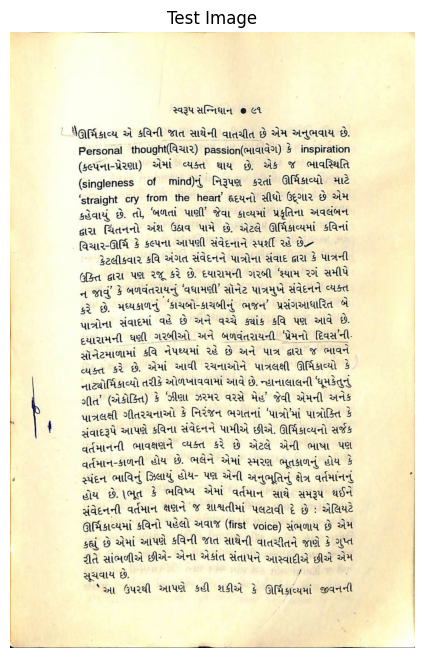

In [ ]:
image = Image.open(test_image_path)
print(f"Image loaded: {test_image_path}")
print(f"Image size: {image.size}")

# Display image in Colab
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.imshow(image)
plt.axis('off')
plt.title('Test Image')
plt.show()

In [ ]:
# Check tokenizer setup
print(f"Vocab size: {processor.tokenizer.vocab_size}")
print(f"PAD token ID: {processor.tokenizer.pad_token_id}")
print(f"EOS token ID: {processor.tokenizer.eos_token_id}")

# Fix pad_token_id if None
if processor.tokenizer.pad_token_id is None:
    processor.tokenizer.pad_token_id = processor.tokenizer.eos_token_id

# Generate with corrected token IDs
with torch.no_grad():
    outputs = model.generate(
        **inputs,
        max_new_tokens=512,
        do_sample=True,
        temperature=0.7,
        top_p=0.9,
        pad_token_id=processor.tokenizer.pad_token_id,
        eos_token_id=processor.tokenizer.eos_token_id,
        bos_token_id=processor.tokenizer.bos_token_id,
    )

Vocab size: 262144
PAD token ID: 0
EOS token ID: 1


RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [ ]:
input_length = inputs['input_ids'].shape[1]
generated_tokens = outputs[0][input_length:]
response = processor.decode(generated_tokens, skip_special_tokens=True).strip()

print("=" * 50)
print("EXTRACTED GUJARATI TEXT:")
print("=" * 50)
print(response)
print("=" * 50)

# Debug: Show full generated text
print("\nDEBUG - Full generated text:")
full_text = processor.decode(outputs[0], skip_special_tokens=True)
print(full_text)